In [1]:
"""
Purpose: To do extra cleaning of skeletons
"""

'\nPurpose: To do extra cleaning of skeletons\n'

In [2]:
import networkx as nx

In [3]:
def find_all_cycles(G, source=None, cycle_length_limit=None):
    """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
    types which work with min() and > ."""
    if source is None:
        # produce edges for all components
        nodes=[i[0] for i in nx.connected_components(G)]
    else:
        # produce edges for components with source
        nodes=[source]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]

In [4]:
G = nx.Graph([(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2)])

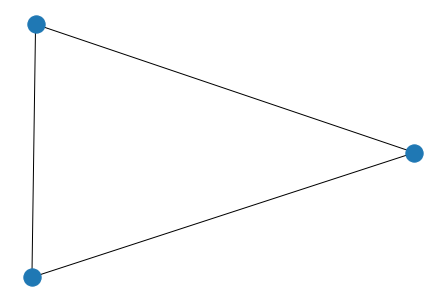

In [5]:
nx.draw(G)

In [6]:
list(nx.simple_cycles(G))

NetworkXNotImplemented: not implemented for undirected type

In [8]:
import networkx as nx
G = nx.Graph([(0, 1), (0, 2), (1, 2)])
try:
   nx.find_cycle(G)
except:
   pass

list(nx.find_cycle(G))


[(0, 1), (1, 2), (2, 0)]